

# Machine Learning Classification of Celestial Objects in the Sloan Digital Sky Survey (SDSS) Dataset

Hello, I am **Khaled Ashraf**. I am an AI Engineer with a focus on machine learning and deep learning. In this project, I have worked on analyzing the Sloan Digital Sky Survey (SDSS) dataset, which is a fascinating collection of astronomical data.

## Overview

This project focuses on applying machine learning techniques to classify celestial objects in the Sloan Digital Sky Survey (SDSS) dataset. The dataset includes classifications of astronomical objects into three categories: stars, galaxies, and quasars. The goal of this project is to build and evaluate a classification model to distinguish between these categories effectively.

## Dataset

The SDSS dataset is comprised of several features that describe the characteristics of celestial objects. Each object is labeled as one of the following classes:
- **Star**: A luminous sphere of plasma held together by its own gravity.
- **Galaxy**: A massive, gravitationally bound system of stars, stellar remnants, interstellar gas, dust, and dark matter.
- **Quasar**: A highly energetic and distant active galactic nucleus with an extremely bright center.

## Objective

The objective of this project is to build and evaluate a machine learning classification model to accurately distinguish between stars, galaxies, and quasars based on their features. The project involves the following key steps:

1. **Data Preprocessing**:
   - **Data Cleaning**: Handle missing values and any inconsistencies in the dataset.
   - **Outlier Removal**: Identify and remove outliers using the Interquartile Range (IQR) method to improve model accuracy.
   - **Normalization**: Scale the data to ensure all features contribute equally to the model's performance.

2. **Model Training and Evaluation**:
   - **Train-Test Split**: Split the dataset into training and testing sets.
   - **Model Selection**: Use a Decision Tree Classifier, tuned with GridSearchCV to find the best hyperparameters.
   - **Evaluation**: Assess model performance using accuracy and confusion matrix.

## Steps Performed

1. **Data Preprocessing**:
   - **Normalization**: Applied `Normalizer` to scale the feature values, ensuring that each feature's contribution to the model is balanced.
   - **Outlier Removal**: Removed outliers using the Interquartile Range (IQR) method to clean the data.

2. **Model Training**:
   - **Model Definition**: Defined and trained a `DecisionTreeClassifier` using the optimal hyperparameters found through GridSearchCV.
   - **Hyperparameter Tuning**: Optimized the model's hyperparameters such as `criterion`, `max_depth`, `min_samples_split`, and `min_samples_leaf`.

3. **Model Evaluation**:
   - **Accuracy Calculation**: Evaluated the model's performance on the test set to determine its accuracy.
   - **Confusion Matrix**: Generated a confusion matrix to visualize the performance of the classification model and identify any misclassifications.

## Results

The trained model achieved an accuracy of 98% on the test set. The confusion matrix provided insights into the distribution of true and predicted classes, helping to understand the model's performance in more detail.

## Conclusion

The analysis demonstrated the capability of the Decision Tree Classifier in classifying celestial objects into their respective categories. The model can be further refined by exploring additional features, advanced models, and tuning techniques.

## Author

This project was conducted by **Khaled Ashraf**, an AI Engineer with a focus on machine learning and deep learning. Khaled is dedicated to leveraging data-driven insights to solve complex problems and advance the field of artificial intelligence.

---

import libraries

In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import Normalizer
from tensorflow import keras
%matplotlib inline


In [2]:

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sloan-digital-sky-survey/Skyserver_SQL2_27_2018 6_51_39 PM.csv


#### read data

In [3]:
data = pd.read_csv("/kaggle/input/sloan-digital-sky-survey/Skyserver_SQL2_27_2018 6_51_39 PM.csv")

data.head()


,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


### Drop columns 


In [4]:
# Drop columns 
# حذف الأعمدة 
data = data.drop(['objid', 'specobjid'], axis=1)

data.head()
data.shape

(10000, 16)

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,STAR,-0.000009,3306,54922,491
1,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,STAR,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,GALAXY,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,STAR,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,GALAXY,0.027583,447,51877,246
9996,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,GALAXY,0.117772,447,51877,228
9997,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,STAR,-0.000402,7303,57013,622
9998,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,GALAXY,0.014019,447,51877,229


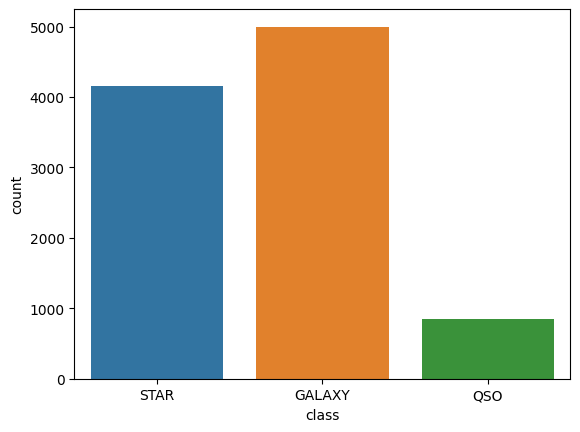

In [5]:
sns.countplot(x=data['class'])
data

<Axes: xlabel='class', ylabel='count'>

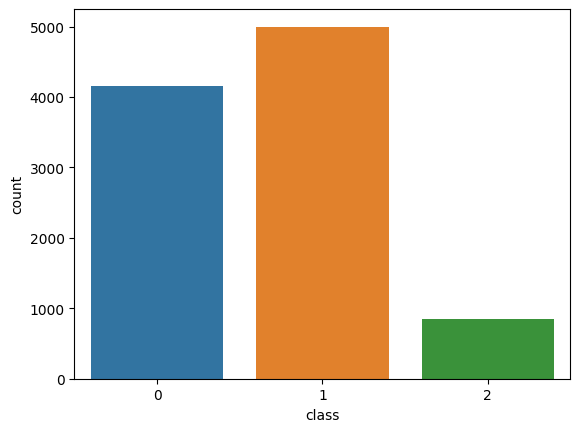

In [6]:
data['class'] = data['class'].map({'STAR': 0, 'GALAXY': 1, 'QSO': 2})

# رسم عدد التكرارات لكل فئة باستخدام countplot
# Plot the count of each class using countplot
sns.countplot(x=data['class'])

In [7]:
data

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,0,-0.000009,3306,54922,491
1,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,0,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,1,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,0,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,0,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,1,0.027583,447,51877,246
9996,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,1,0.117772,447,51877,228
9997,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,0,-0.000402,7303,57013,622
9998,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,1,0.014019,447,51877,229


In [8]:
missing_values = data.isnull().sum()
missing_values

ra          0
dec         0
u           0
g           0
r           0
i           0
z           0
run         0
rerun       0
camcol      0
field       0
class       0
redshift    0
plate       0
mjd         0
fiberid     0
dtype: int64

In [9]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ra        10000 non-null  float64
 1   dec       10000 non-null  float64
 2   u         10000 non-null  float64
 3   g         10000 non-null  float64
 4   r         10000 non-null  float64
 5   i         10000 non-null  float64
 6   z         10000 non-null  float64
 7   run       10000 non-null  int64  
 8   rerun     10000 non-null  int64  
 9   camcol    10000 non-null  int64  
 10  field     10000 non-null  int64  
 11  class     10000 non-null  int64  
 12  redshift  10000 non-null  float64
 13  plate     10000 non-null  int64  
 14  mjd       10000 non-null  int64  
 15  fiberid   10000 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 1.2 MB


### outliers

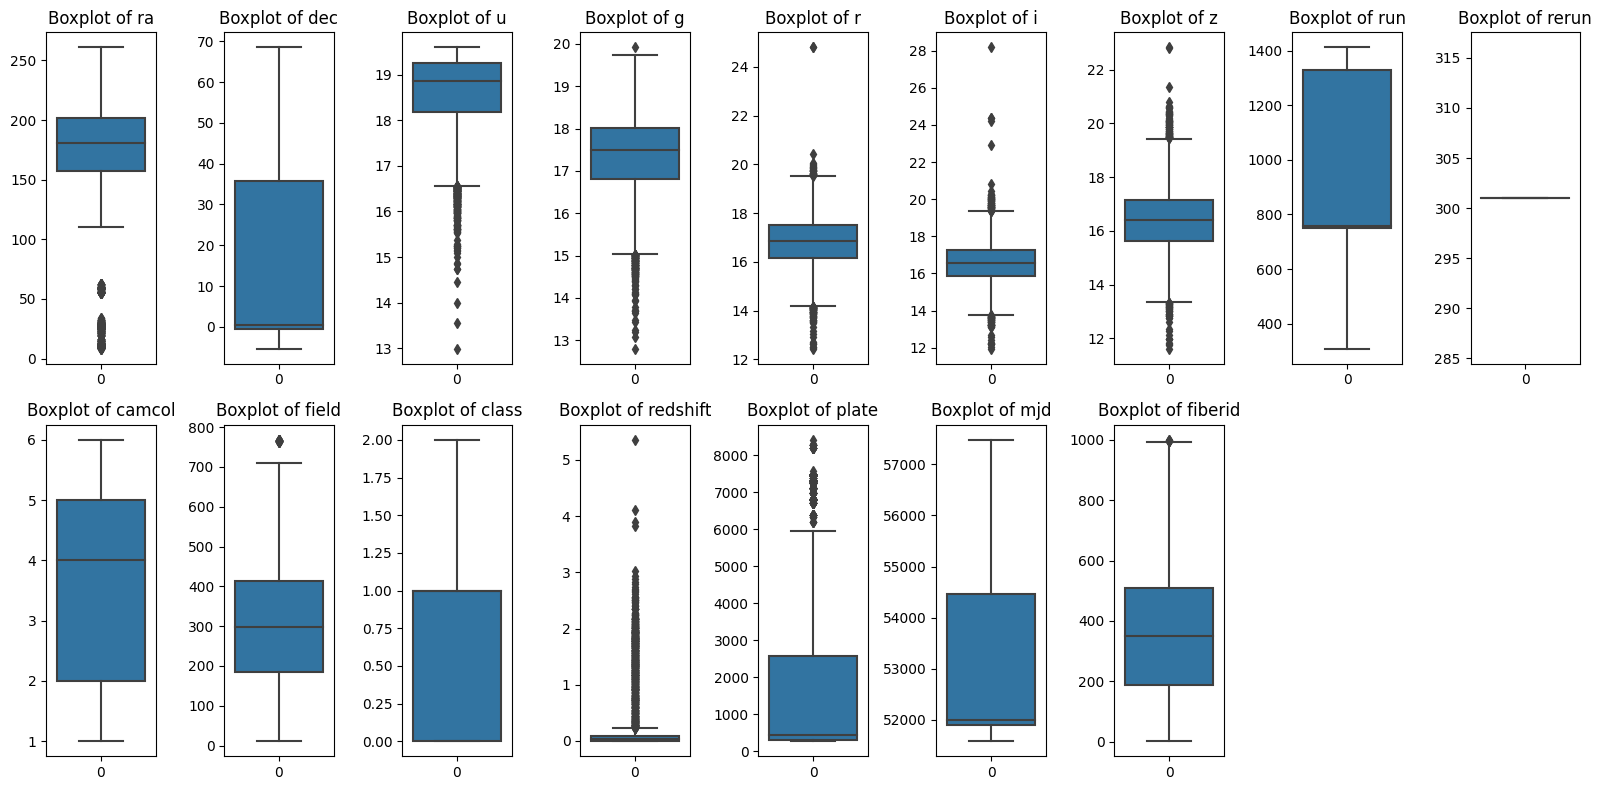

In [10]:
# افترض أن البيانات موجودة في DataFrame يسمى `data`
# Assume the data is in a DataFrame named `data`

# اختيار الأعمدة العددية
# Select numeric columns
numeric_columns = data.select_dtypes(include='number').columns

# تحديد حجم الرسم
# Define the size of the plot
plt.figure(figsize=(16, 8))  # يمكنك تعديل الأبعاد حسب الحاجة
# You can adjust the dimensions as needed

# رسم boxplot لكل عمود عددي في رسم واحد
# Plot a boxplot for each numeric column in one figure
for i, col in enumerate(numeric_columns):
    plt.subplot(2, len(numeric_columns) // 2 + 1, i + 1)  # تحديد الصفوف والأعمدة بناءً على عدد الأعمدة
    # Determine rows and columns based on the number of columns
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel('')  # إزالة تسمية المحور X لتجنب التكرار
    # Remove X-axis label to avoid repetition

plt.tight_layout()  # تحسين التخطيط
plt.show()


### outliers

### Remove outliers from the DataFrame


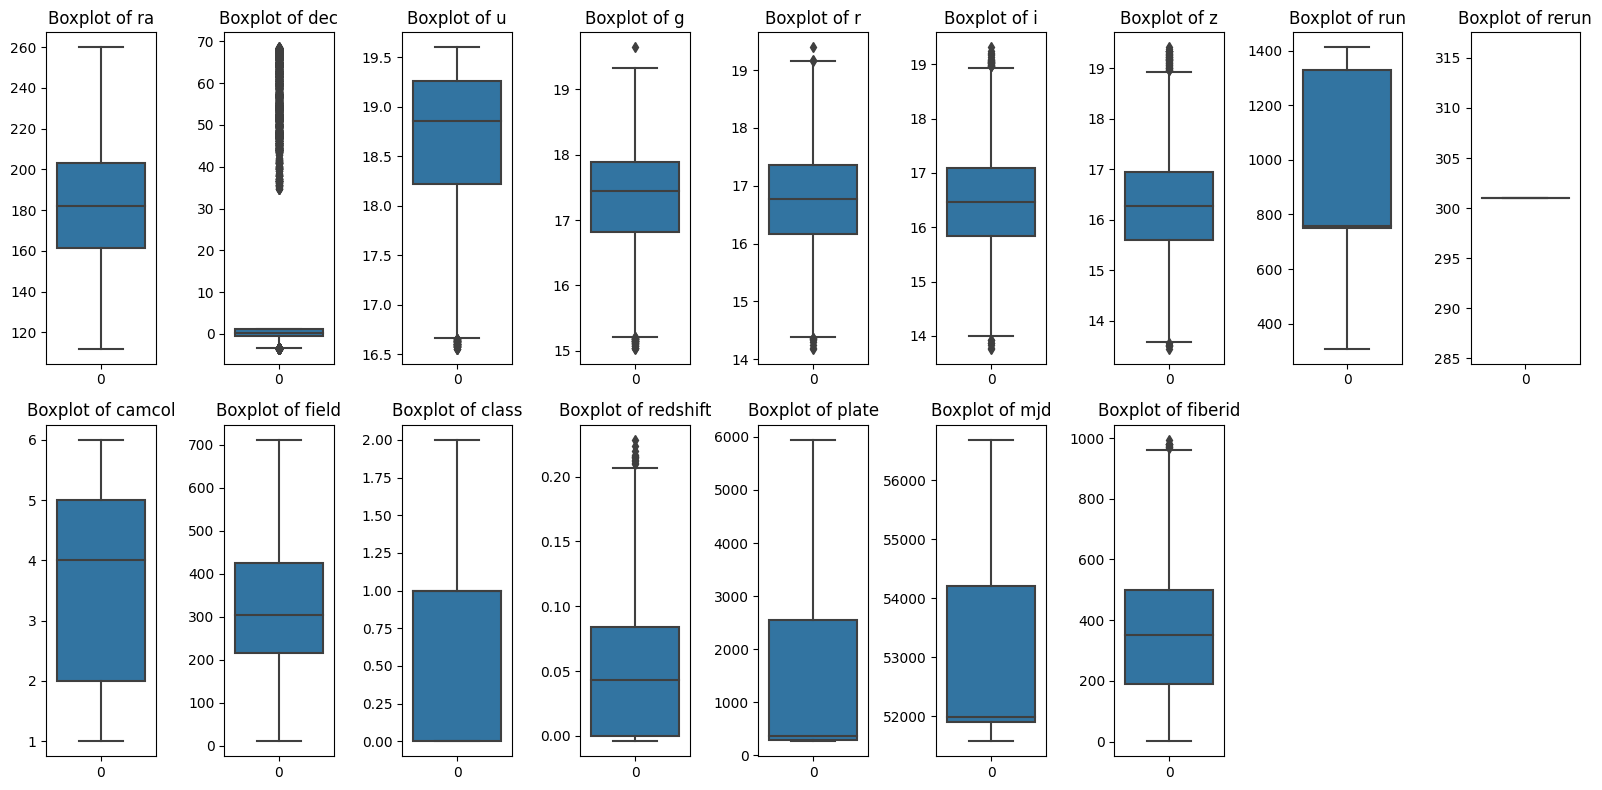

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# افترض أن البيانات موجودة في DataFrame يسمى `df`
# Assume the data is in a DataFrame named `df`

# دالة لإزالة الأوتلايرز باستخدام IQR وتصفية إضافية
# Function to remove outliers using IQR and additional filtering
def remove_outliers(df):
    df_no_outliers = df.copy()  # إنشاء نسخة من DataFrame للتعامل معها
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            Q1 = df[column].quantile(0.25)  # حساب الربع الأول
            Q3 = df[column].quantile(0.75)  # حساب الربع الثالث
            IQR = Q3 - Q1  # حساب نطاق الربع
            lower_bound = Q1 - 1.5 * IQR  # حساب الحد الأدنى
            upper_bound = Q3 + 1.5 * IQR  # حساب الحد الأقصى
            df_no_outliers = df_no_outliers[(df_no_outliers[column] >= lower_bound) & (df_no_outliers[column] <= upper_bound)]
    return df_no_outliers

# إزالة الأوتلايرز من DataFrame
# Remove outliers from the DataFrame
df_no_outliers = remove_outliers(data)

# إعادة تحديد الأعمدة العددية بعد إزالة الأوتلايرز
# Re-select numeric columns after removing outliers
numeric_columns = df_no_outliers.select_dtypes(include='number').columns

# تحديد حجم الرسم
# Define the size of the plot
plt.figure(figsize=(16, 8))  # يمكنك تعديل الأبعاد حسب الحاجة
# You can adjust the dimensions as needed

# رسم boxplot لكل عمود عددي في رسم واحد
# Plot a boxplot for each numeric column in one figure
for i, col in enumerate(numeric_columns):
    plt.subplot(2, len(numeric_columns) // 2 + 1, i + 1)  # تحديد الصفوف والأعمدة بناءً على عدد الأعمدة
    # Determine rows and columns based on the number of columns
    sns.boxplot(df_no_outliers[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel('')  # إزالة تسمية المحور X لتجنب التكرار
    # Remove X-axis label to avoid repetition

plt.tight_layout()  # تحسين التخطيط
plt.show()

# تخزين البيانات المعالجة في كائن جديد
# Store the processed data in a new object
new_data = df_no_outliers


In [12]:
new_data

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,0,-0.000009,3306,54922,491
1,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,0,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,1,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,0,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,0,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,131.398915,51.533706,17.79613,16.02621,15.15955,14.71488,14.33840,1345,301,3,161,1,0.055515,447,51877,249
9995,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,1,0.027583,447,51877,246
9996,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,1,0.117772,447,51877,228
9998,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,1,0.014019,447,51877,229


### Normalizing Data


In [13]:
# افترض أن البيانات موجودة في DataFrame يسمى `data`
# Assume the data is in a DataFrame named `data`

# تحديد الأعمدة العددية من البيانات
# Select numeric columns from the data
numeric_columns = data.select_dtypes(include='number').columns

# تحديد اسم العمود الهدف
# Define the name of the target column
target_column_name = 'class'  # استبدل هذا باسم العمود الهدف الفعلي
# Replace this with the actual name of the target column

# فصل الخصائص (X) والنتائج (y) من البيانات
# Separate features (X) and target (y) from the data
X = data[numeric_columns].drop(columns=[target_column_name])
y = data[target_column_name]

# تقسيم البيانات إلى مجموعة تدريب ومجموعة اختبار
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizing Data
# Normalizing Data
scaler = Normalizer(copy=True, norm='l2')  # يمكنك تغيير norm إلى 'l1' أو 'max'
# You can change the norm to 'l1' or 'max'
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# تحويل المصفوفات إلى DataFrame
# Convert the arrays to DataFrame
X_train_normalized_df = pd.DataFrame(X_train_normalized, columns=X_train.columns)
X_test_normalized_df = pd.DataFrame(X_test_normalized, columns=X_test.columns)

# عرض البيانات
# Display the data
print('X_train_normalized_df \n', X_train_normalized_df.head())
print('y_train \n', y_train.head())
print('X_test_normalized_df \n', X_test_normalized_df.head())
print('y_test \n', y_test.head())


X_train_normalized_df 
          ra       dec         u         g         r         i         z  \
0  0.002661  0.001081  0.000360  0.000327  0.000308  0.000299  0.000292   
1  0.004305 -0.000015  0.000374  0.000349  0.000339  0.000334  0.000330   
2  0.004964  0.001103  0.000377  0.000345  0.000329  0.000322  0.000316   
3  0.003241 -0.000011  0.000375  0.000372  0.000371  0.000368  0.000363   
4  0.000187  0.000260  0.000319  0.000291  0.000278  0.000273  0.000267   

        run     rerun    camcol     field      redshift     plate       mjd  \
0  0.025900  0.005796  0.000077  0.003890  1.592797e-06  0.008685  0.999579   
1  0.014460  0.005788  0.000038  0.010326  1.636689e-06  0.005942  0.999796   
2  0.025787  0.005810  0.000019  0.001197  2.428841e-06  0.006852  0.999595   
3  0.014564  0.005799  0.000039  0.006743  4.119416e-05  0.005356  0.999834   
4  0.018302  0.005323  0.000053  0.000601  6.787049e-07  0.109585  0.993656   

    fiberid  
0  0.006104  
1  0.001827  
2  0.006

### Apply GridSearchCV


In [14]:
# تعريف نموذج DecisionTreeClassifier
# Define the DecisionTreeClassifier model
model = DecisionTreeClassifier(random_state=33)

# تعريف مجموعة المعاملات التي سيتم اختبارها
# Define the parameter grid to be tested
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# تطبيق GridSearchCV
# Apply GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_normalized, y_train)

# عرض أفضل المعاملات والنموذج الأفضل
# Display the best parameters and best model
print('Best Parameters:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)

# استخدام النموذج الأفضل للتنبؤ
# Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_normalized)

# حساب الدقة للنموذج الأفضل على مجموعة الاختبار
# Calculate the accuracy of the best model on the test set
test_score = accuracy_score(y_test, y_pred)
print('Test Score for Best Model:', test_score)


Fitting 5 folds for each of 90 candidates, totalling 450 fits


/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best Score: 0.9867142857142858
Test Score for Best Model: 0.9836666666666667


### تعريف نموذج DecisionTreeClassifier مع المعاملات المثلى
### Define the DecisionTreeClassifier model with the best parameters

In [15]:

best_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=None,
    min_samples_split=10,
    min_samples_leaf=2,
    random_state=33
)

# تدريب النموذج
# Train the model
best_model.fit(X_train_normalized, y_train)

# حساب الدقة على مجموعة التدريب
# Calculate the accuracy on the training set
train_score = best_model.score(X_train_normalized, y_train)
print('Train Score for Best Model:', train_score)

# حساب الدقة على مجموعة الاختبار
# Calculate the accuracy on the test set
test_score = best_model.score(X_test_normalized, y_test)
print('Test Score for Best Model:', test_score)

# حساب التنبؤات
# Calculate the predictions
y_pred = best_model.predict(X_test_normalized)

# حساب دقة التنبؤات
# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Predictions:', accuracy)


Train Score for Best Model: 0.992
Test Score for Best Model: 0.9836666666666667
Accuracy of Predictions: 0.9836666666666667


In [16]:
print("Type of y_test:", type(y_test))
print("Type of y_pred:", type(y_pred))

print("Unique values in y_test:", np.unique(y_test))
print("Unique values in y_pred:", np.unique(y_pred))


Type of y_test: <class 'pandas.core.series.Series'>
Type of y_pred: <class 'numpy.ndarray'>
Unique values in y_test: [0 1 2]
Unique values in y_pred: [0 1 2]


### Confusion Matrix

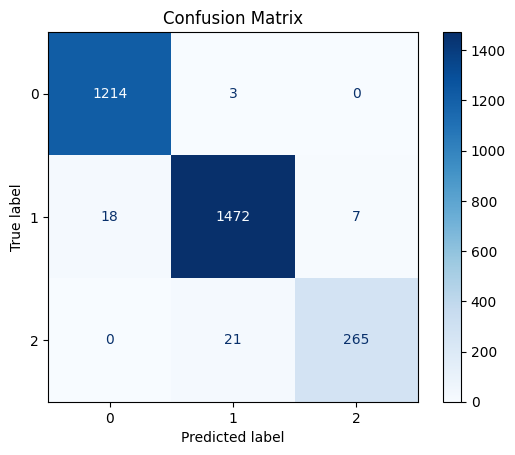

In [17]:
# تحويل y_pred إلى Series
# Convert y_pred to Series
y_pred_series = pd.Series(y_pred)

# حساب مصفوفة الالتباس
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_series)

# عرض مصفوفة الالتباس
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
